# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (15278247), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as cm

from importlib import reload

## 2. Flow Functions

In [110]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

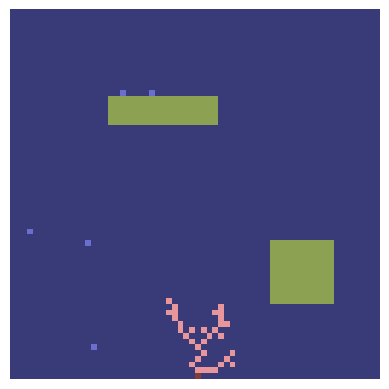

In [112]:
# Time / space parameters
size = 64
steps = 1000

# Environment parameters
gravity = True
bottom = size - 1
Moore = True
obstacle = True
sun = 1

# Initialize lattice
seeds = np.array([(bottom, int(size/2))])
lattice = dm.init_lattice(size, seeds)

# Initialize obstacle lattice
if obstacle:
    boxes = np.array([[15,17,19,35], [40, 45, 50, 55]])
    obstacle = dm.init_obstacle_lattice(size, boxes=boxes, seed_coords=seeds)

# Initialize particles
particle_density = 0.01
particles = dm.init_particles(lattice, particle_density, obstacles=obstacle)

# Arrays for storing time frames
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=(False, False), moore=Moore, obstacles=obstacle, drift_vec=[1, 0], regen_bndry=False)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, moore=Moore, obstacles=obstacle, sun_vec=[0.1, 0])
    # print(f"step {step}: {current_lattice}")

vt.animate_lattice_2D((lattice_frames*5 + particles_frames + obstacle*2)/8, interval=10)

## 3. Fractal Dimension

In [ ]:
# Reload modules
reload(cm)
reload(vt)

In [ ]:
print(current_lattice.shape[0])
fractal_dims, scales, n_boxes, coeffs = cm.fractal_dimension_clusters(current_lattice)

print(fractal_dims)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Simulation Series

In [19]:
# Reload modules
reload(dm)
reload(ds)
reload(cm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

In [20]:
# Define environment parameter series
lattice_size_series = np.array([128])
max_timesteps_series = np.array([5000])
seeds_series = np.array([[[32, 32]]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.025 * lattice_size_series[0]**2), int(0.05 * lattice_size_series[0]**2)])

# Define fixed simulation parameters
radius_scale_mode = True
track_radius = True
periodic = (False, True)
move_moore = False
aggr_moore = False
regen_toggle = False

# Run simulations
n_sims = 5
sim_results, dla_evolutions = ds.analyse_fractal_dimension(n_sims, lattice_size_series, max_timesteps_series, seeds_series, particle_density_series, target_mass_series, 
                                                           radius_scale_mode=radius_scale_mode, n_saved_sims=1, track_radius=track_radius,
                                                           periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_toggle=regen_toggle)

Running parameters: lattice_size: 128; max_timesteps: 5000; seeds: [[32 32]]; particle_density: 0.1; target_mass: 409
Running simulation 1 of 5


TypeError: aggregate_particles() got an unexpected keyword argument 'periodic'

In [ ]:
sim_results